In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [146]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Analyse

In [147]:
df.shape

(100000, 9)

In [148]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [150]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [151]:
df.dtypes.value_counts()

int64      4
float64    3
object     2
dtype: int64

In [152]:
df.isna().value_counts()

gender  age    hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level  diabetes
False   False  False         False          False            False  False        False                False       100000
dtype: int64

In [167]:
df['diabetes'].value_counts(normalize=True)

0    0.915
1    0.085
Name: diabetes, dtype: float64

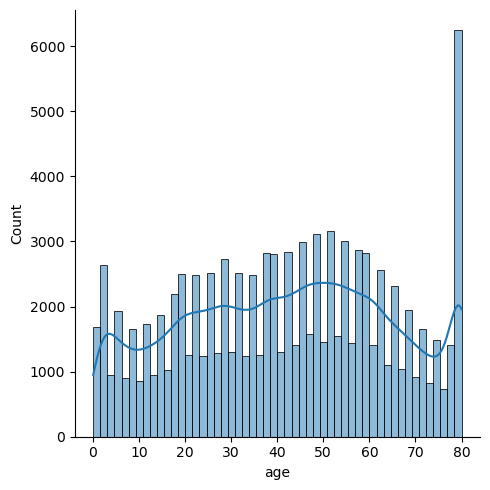

In [168]:
sns.displot(df['age'],kde=True)

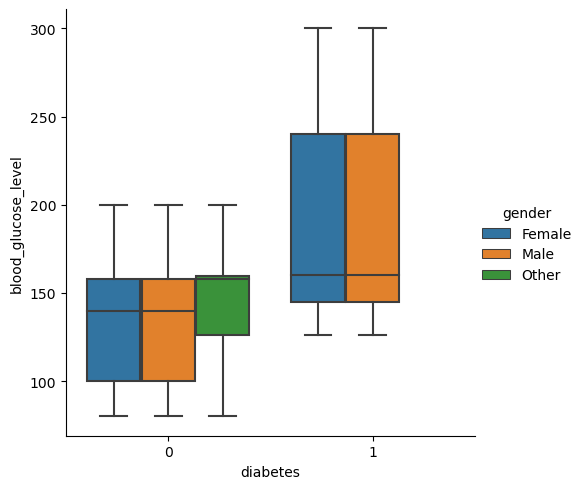

In [172]:
sns.catplot(data = df, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

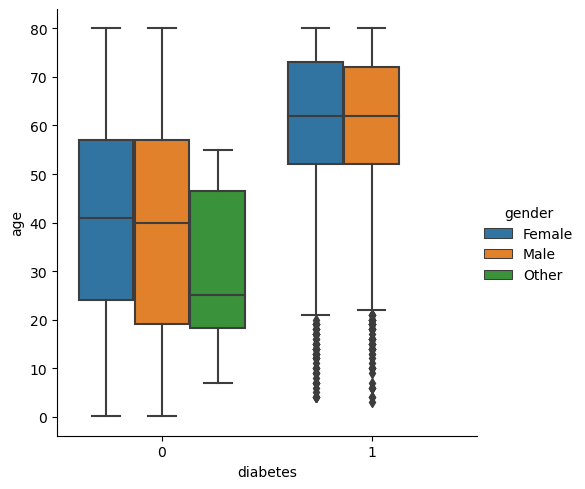

In [173]:
sns.catplot(data = df, x = 'diabetes', y = 'age', kind = 'box', hue = 'gender')
plt.show()

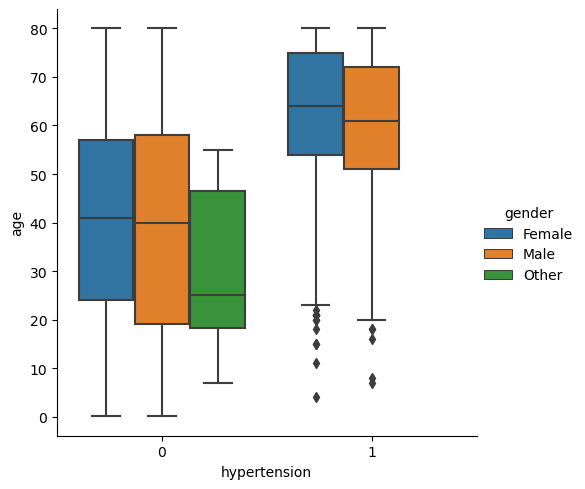

In [174]:
sns.catplot(data = df, x = 'hypertension', y = 'age', kind = 'box', hue = 'gender')
plt.show()

# Variables qualitatives

In [175]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

In [176]:
for columns in df.select_dtypes('object'):
    print(f'{columns:-<50}{df[columns].unique()}')

gender--------------------------------------------['Female' 'Male' 'Other']
smoking_history-----------------------------------['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [177]:
for columns in df.select_dtypes('int64'):
    print(f'{columns:-<50}{df[columns].unique()}')

hypertension--------------------------------------[0 1]
heart_disease-------------------------------------[1 0]
blood_glucose_level-------------------------------[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes------------------------------------------[0 1]


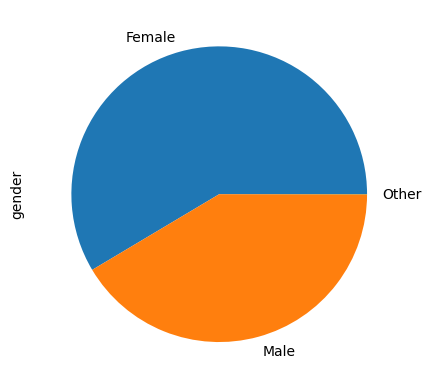

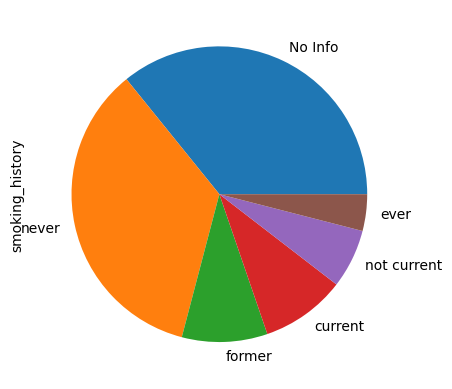

In [178]:
for columns in df.select_dtypes('object'):
    plt.figure()
    df[columns].value_counts().plot.pie()

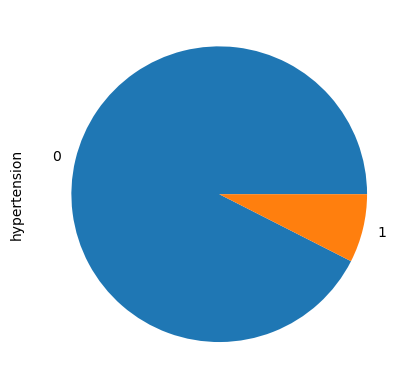

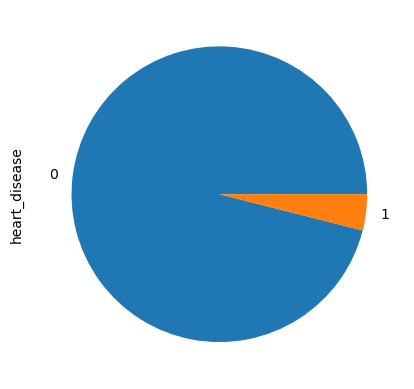

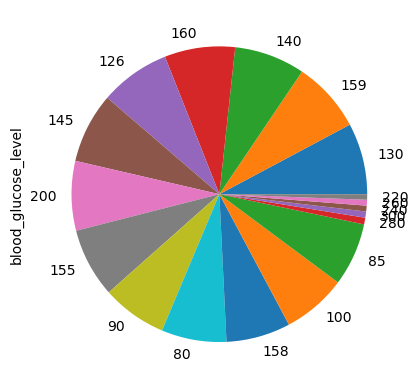

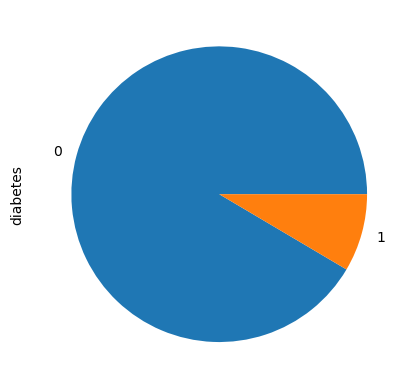

In [179]:
for columns in df.select_dtypes('int64'):
    plt.figure()
    df[columns].value_counts().plot.pie()

C:\Users\mtx\AppData\Local\Temp\ipykernel_112000\3815931840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


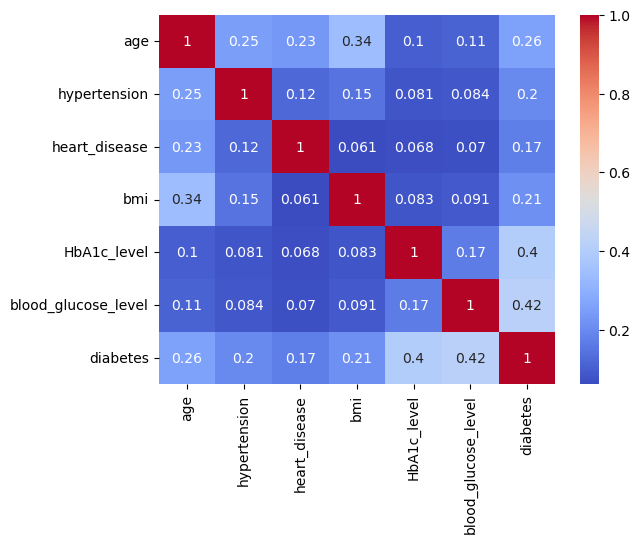

In [180]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Création sous ensembles positifs et negatifs

In [181]:
positive_df = df[df['diabetes']==1]

In [182]:
negative_df = df[df['diabetes']==0]